In [28]:
import string
from scipy.special import hermite
import numpy as np
import tensorflow as tf
from tensorflow.python.ops.special_math_ops import _einsum_v1 as einsum

num_modes = 2
cutoff = 4
num_points = 1000 

alpha = tf.Variable(
    [
        [ 1.0000000e+00-2.9771756e-09j, -2.2837524e-04-4.8372490e-06j, 2.2475776e-04-3.0911028e-06j, -8.8906148e-08-7.1808154e-10j],
        [ 1.0598104e-04+2.2621527e-05j,  5.0736486e-05+1.8292945e-05j, 7.6297164e-09-1.5074212e-09j, -2.2241665e-08+2.6585192e-09j],
        [ 2.5927270e-04+1.0559565e-07j, -5.2198594e-08+3.0939069e-09j, 3.7299468e-08+6.8964878e-10j, -1.7284450e-11-2.9644757e-13j],
        [ 4.7610726e-08+1.0228970e-08j,  4.2539529e-08+3.9197228e-09j, -5.1839774e-12+9.6739988e-13j, -1.8434941e-12+5.1965905e-14j]
    ]
)

x = tf.linspace(-100, 100, num_points)
dx = x[1] - x[0]

def amplitude(
    x: tf.Tensor,
    alpha: tf.Tensor,
    num_modes: int,
    cutoff: int
) -> tf.Tensor:

    num_points = x.shape[0]

    einsum_rule = ''.join(
        [string.ascii_lowercase[: num_modes]] \
        + [',' + string.ascii_lowercase[i] + string.ascii_lowercase[num_modes+i] for i in range(num_modes)] \
        + ['->'] + [string.ascii_lowercase[num_modes+i] for i in range(num_modes)]
    )

    hermite_tensor = tf.Variable(np.zeros(shape=(cutoff, num_points)), dtype=tf.complex128)

    for n in range(cutoff):

        h = hermite(n)
        wave = tf.Variable(h(x)) * tf.exp(-x**2 / 2)/ (np.sqrt(np.sqrt(np.pi)*(2**n)*np.math.factorial(n)))
        wave = tf.cast(wave, tf.complex128)
        hermite_tensor[n].assign(wave)

    amp = einsum(einsum_rule, alpha, *(hermite_tensor for _ in range(num_modes)))

    return amp

def quadratures_densities(
    x: tf.Tensor,
    alpha: tf.Tensor,
    num_modes: int,
    cutoff: int
) -> tf.Tensor:

    amp = amplitude(x, alpha, num_modes, cutoff)
    density = tf.abs(amp)**2

    return density  

In [29]:
rho = quadratures_densities(x, alpha, num_modes, cutoff)

tf.einsum('ab,a,b->', dx**num_modes * rho, x, x)

<tf.Tensor: shape=(), dtype=float64, numpy=5.0746830160635755e-05>

In [35]:
tf.einsum('ab->b', dx**num_modes * rho)


<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000

In [ ]:
np.fromfunction(lambda i, j: j, (3, 3), dtype=float) 

In [ ]:
import numpy as np

x = np.array([2, 3])


In [ ]:
L = x.shape[0]
term01 = np.einsum('a,b->ab', x, x).reshape((L,1,1,L,1,1)).repeat(L,1).repeat(L,2).repeat(L,4).repeat(L,5)
term02 = np.einsum('a,b->ab', x, x).reshape((1,L,1,1,L,1)).repeat(L,0).repeat(L,2).repeat(L,3).repeat(L,5)
term03 = np.einsum('a,b->ab', x, x).reshape((1,1,L,1,1,L)).repeat(L,0).repeat(L,1).repeat(L,3).repeat(L,4)

In [ ]:
import tensorflow as tf
x = tf.linspace(0, 1, 3)
L = x.shape[0]

In [ ]:
tf.reshape(x, (L,1,1,L,1,1))

In [ ]:
term01 = tf.repeat(tf.repeat(tf.repeat(tf.repeat(tf.einsum('a,b->ab', x, x)[:,tf.newaxis,tf.newaxis,:,tf.newaxis,tf.newaxis], L, 1), L, 2), L, 4), L, 5)
term02 = tf.repeat(tf.repeat(tf.repeat(tf.repeat(tf.einsum('a,b->ab', x, x)[tf.newaxis,:,tf.newaxis,tf.newaxis,:,tf.newaxis], L, 0), L, 2), L, 3), L, 5)
term03 = tf.repeat(tf.repeat(tf.repeat(tf.repeat(tf.einsum('a,b->ab', x, x)[tf.newaxis,tf.newaxis,:,tf.newaxis,tf.newaxis,:], L, 0), L, 1), L, 3), L, 4)

In [1]:
import numpy as np

distance = np.load('./logs/model=32/2023.01.30.15.35.16/energy_surface/distance_list.npy')
energy_surface = np.load('./logs/model=32/2023.01.30.15.35.16/energy_surface/energy_surface.npy')

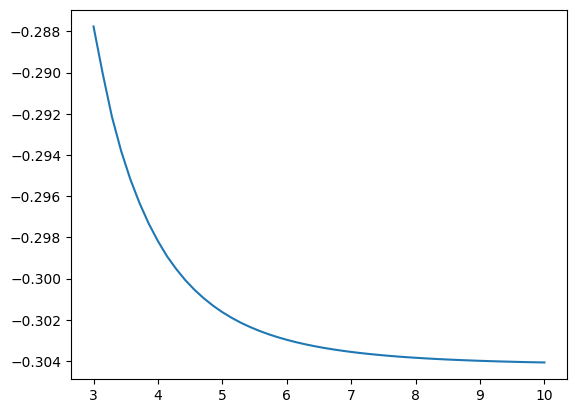

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(distance, energy_surface)
plt.show()

In [5]:
energy_surface[-1]+1

0.6959332419103715

In [4]:
import tensorflow as tf
x = tf.constant([0, 1, 2, 3])
tf.einsum('a,b,a->ab', x, x, x)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  0,  0,  0],
       [ 0,  1,  2,  3],
       [ 0,  4,  8, 12],
       [ 0,  9, 18, 27]], dtype=int32)>

In [5]:
tf.einsum('a,b,b->ab', x, x, x)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  0,  0,  0],
       [ 0,  1,  4,  9],
       [ 0,  2,  8, 18],
       [ 0,  3, 12, 27]], dtype=int32)>

In [6]:
tf.einsum('a,b->ab', x**2, x)

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  0,  0,  0],
       [ 0,  1,  2,  3],
       [ 0,  4,  8, 12],
       [ 0,  9, 18, 27]], dtype=int32)>

In [7]:
from src.utils import quadratures_density

x = tf.constant([[1, 2], [3, 4]])
y = tf.constant([[2, 2], [2, 3]])

tf.einsum('ab,ab->', x, y)

<tf.Tensor: shape=(), dtype=int32, numpy=24>

In [6]:
import numpy as np
import tensorflow as tf

marginals = np.load("logs/model=21/2023.02.03.15.29.25/states/marginals.npy")

2023-02-03 15:30:44.328051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-03 15:30:44.434009: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-03 15:30:44.434022: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-03 15:30:44.876656: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [7]:
marginals.shape

(20, 2, 20)

In [8]:
XMIN = -7.0
XMAX = 7.0
NUM_POINTS = 20
dx = (XMAX - XMIN) / (NUM_POINTS - 1)

In [9]:
tf.einsum('a->', dx * marginals[10,1])

2023-02-03 15:30:49.751526: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-03 15:30:49.751542: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-03 15:30:49.751554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (uni-OptiPlex-7480-AIO): /proc/driver/nvidia/version does not exist
2023-02-03 15:30:49.751784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(), dtype=float64, numpy=0.9999990805488396>